In [1]:
import numpy as np
import sys,os
import pandas as pd
sys.path.append("../bin")
import matplotlib.pyplot as plt
import N4univ
instance=N4univ.GRFCalculations_100_100_15()

In [2]:
def makeplot(parset,instance=None,xmin=-6,xmax=6,xlim0=None,xlim1=None,n=10000,ylim0_g=None,ylim1_g=None):
    othervars=np.array([0])
    xvals=np.logspace(xmin,xmax,n)
    log10xvals=np.log10(xvals)
    instance.fill_num_den(parset,othervars)
    
    out_notnorm=np.zeros(len(xvals))
    for x_ in range(n):
        out_notnorm[x_]=instance.interfaceGRF(xvals[x_])
    
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    posraw=pos*x05
    stpraw=stp/x05
    
    
    print("pos:",pos,"stp:",stp,"x05:",x05, "raw position:", posraw, "raw steepness:", stpraw)
    
    out=np.zeros(len(xvals)) #this will be normalised
    for x_ in range(n):
        out[x_]=instance.interfaceGRF(xvals[x_])
        
    fig,axes=plt.subplots(1,3,figsize=(10,4))
    
    ax=axes[0] #plot of original function, natural scale axes
    ax.set_title("original function and derivative")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x) (not normalised)")
    ax.plot(xvals,out_notnorm,color="k")
    #ax.set_xlim(np.min([min(xvals),(0.01*posraw)]),np.max([max(xvals),100*x05]))
    if posraw<x05:
        xmin=0.01*posraw
        xmax=10*x05
    else:
        xmin=0.01*x05
        xmax=posraw*10
    ax.set_xlim(xmin, xmax)
    ax.axvline(x=posraw,linestyle=":",color="gray")
    ax.text(posraw,0,"raw pos", rotation=90)
    ax.axvline(x=x05,linestyle="--",color="gray")
    ax.text(x05,0,"x05",rotation=90)
    
    ax=ax.twinx()#plot of original function derivative
    der_notnorm=np.diff(out_notnorm)/np.diff(xvals)
    ax.plot(xvals[:-1],der_notnorm,color="r")
    ax.set_ylabel("df(x)/dx (not normalised)",color="r")
    ax.axhline(y=stpraw,linestyle=":",color="r")
    
    
    ax=axes[1] #plot of original function, log scale x
    ax.set_title("original function and derivative")
    ax.set_xlabel("log10(x)")
    ax.set_ylabel("f(x) (not normalised)")
    ax.plot(log10xvals,out_notnorm,color="k")
    ax.set_xlim(np.min([min(log10xvals),np.log10(0.01*posraw)]),np.max([max(log10xvals),np.log10(100*x05)]))
    ax.axvline(x=np.log10(posraw),linestyle=":",color="gray")
    ax.text(np.log10(posraw),0,"raw pos")
    ax.axvline(x=np.log10(x05),linestyle="--",color="gray")
    ax.text(np.log10(x05),0,"x05")
    
    ax=ax.twinx()#plot of original function derivative
    der_notnorm=np.diff(out_notnorm)/np.diff(xvals)
    ax.plot(log10xvals[:-1],der_notnorm,color="r")
    ax.set_ylabel("df(x)/dx (not normalised)",color="r")
    ax.axhline(y=stpraw,linestyle=":",color="r")
    
    
    
    ax=axes[2]
    ax.set_title("normalised function and derivative")
    ax.plot(log10xvals,out,color="k",label="normalised f")
    ax.axvline(x=0,linestyle="--",color="gray")
    ax.axvline(x=np.log10(pos),linestyle=":",color="gray")
    ax.text(np.log10(pos),0,"pos")
    ax.set_xlabel("log10(x)")
    ax.set_ylabel("g(y)")
    ax.set_xlim(xlim0,xlim1)
    ax.set_ylim(ylim0_g,ylim1_g)
    
    ax=ax.twinx()
    der=np.diff(out)/np.diff(xvals) #note that we define g(y)=f(y*x05), so the xvals are the original ones
    ax.plot(log10xvals[:-1],der,color="orange",label="derivative")
    ax.plot(log10xvals[:-1],np.abs(der),color="red",label="abs(derivative)")
    ax.set_xlim(xlim0,xlim1)


    #ax.axvline(x=np.log10(pos),linestyle=":",color="gray")
    ax.axhline(y=stp,linestyle=":",color="r")
    #ax.set_xlabel("log10(x)")
    ax.set_ylabel("abs(dg(y)/dx)",color="r")
    ax.legend()
    
    
    plt.tight_layout()
    plt.show()

In [3]:
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_04_05_N4univ_allregion/tocheck_N4univ"
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked2" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

In [4]:
alldata=[]
for f in checkedfiles1:
    
    data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
    alldata.append(data)
alldata=pd.concat(alldata)

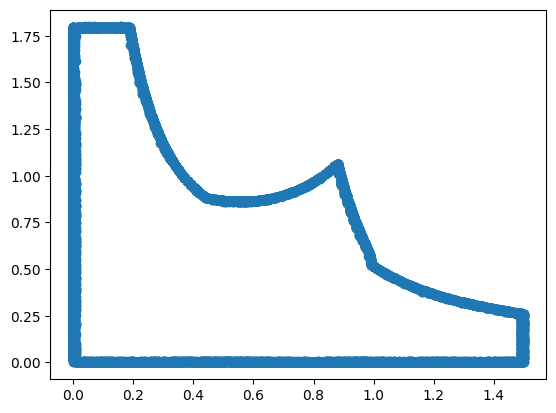

In [5]:
plt.scatter(alldata["pos"],alldata["rho"])
plt.show()

In [6]:
## low position - high steepness region

In [7]:
subdf_lowp_highs=alldata[(alldata["pos"]<1e-4)&(alldata["rho"]>1.5)]
len(subdf_lowp_highs)

275

In [8]:
#first doublecheck that raw position is BEFORE x05:
othervars=np.array([0])
subdf=subdf_lowp_highs
for i in range(len(subdf)):
    parset=subdf.iloc[i].values[2:].copy()
    #print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    rawpos=pos*x05
    if rawpos>x05:
        print("instance where it doesn´t hold")
        makeplot(parset,instance=instance,xmin=-10,xmax=10)
    else:
        print(".",end=",")

.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,

538.808,0.00153834,0.00142145,0.00142145,0.00125927,0.001,329.832,0.001,0.001,0.001
pos: 2.1147426490494424e-06 stp: 1.5083083341425234 x05: 329831.88339098217 raw position: 0.6975095508232124 raw steepness: 4.5729609843526774e-06


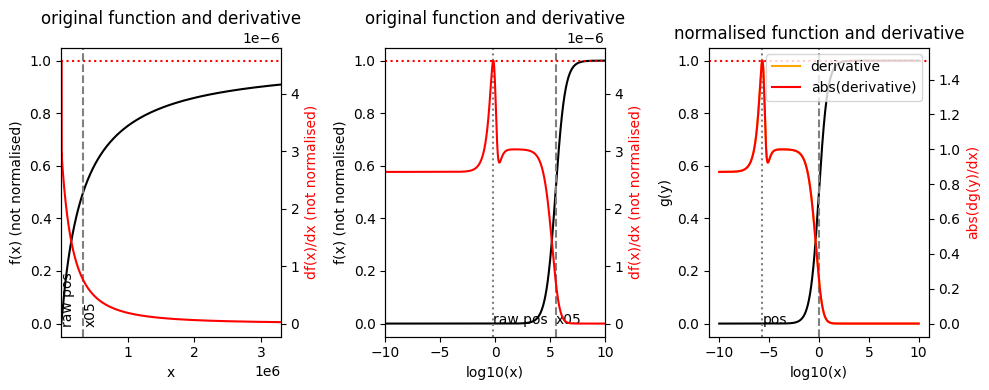

373.297,0.001,0.001,0.001,0.001,0.001,618.703,0.001,0.00138129,0.00138129
pos: 6.715648558246272e-07 stp: 1.6164446570309796 x05: 447917.75427625485 raw position: 0.3008058220718239 raw steepness: 3.6087979134536196e-06


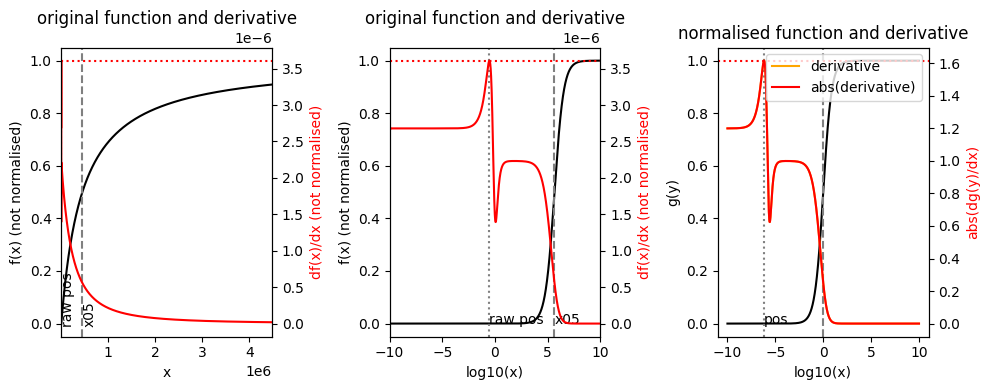

1000.0,0.001,0.00186994,0.001,0.379751,0.00134267,298.461,0.001,0.001,0.001
pos: 4.297450762167097e-06 stp: 1.7216433878341961 x05: 298459.59818397206 raw position: 1.2826154276917965 raw steepness: 5.768430294451332e-06


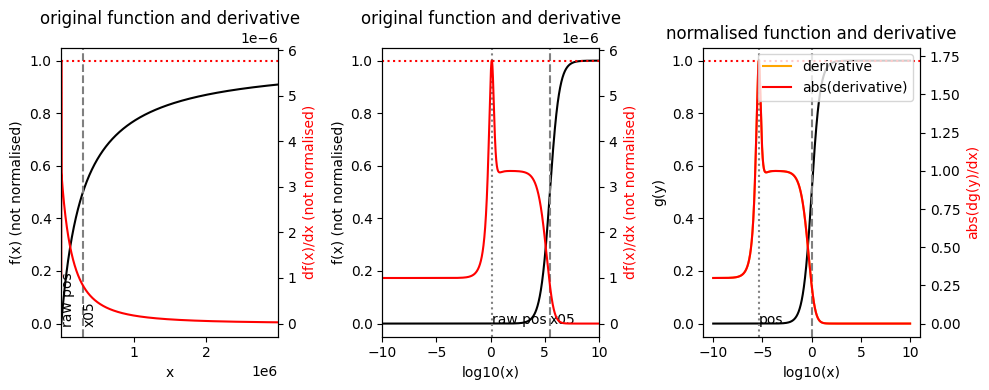

1000.0,0.00367118,0.0708655,0.001,0.0837068,0.00231691,78.2355,0.001,0.001,0.001
pos: 2.934997785052612e-05 stp: 1.5649895550248656 x05: 78234.07543871623 raw position: 2.296168381282711 raw steepness: 2.0003937494612334e-05


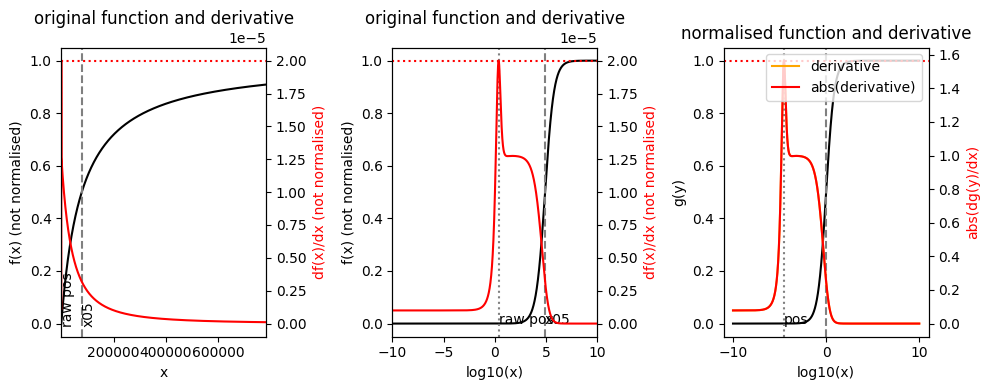

1000.0,0.001,0.001,0.001,1.18021,0.00102031,761.045,0.001,0.001,0.001
pos: 9.337984153291777e-07 stp: 1.6886887241465534 x05: 761044.5236376204 raw position: 0.7106621701677588 raw steepness: 2.2189092381546927e-06


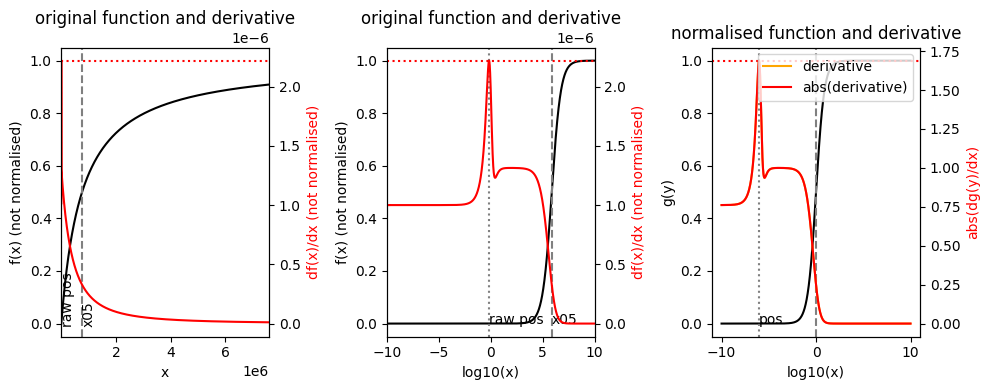

0.82233,0.001,3.331,0.00433077,0.00298149,0.00298149,2.6615,0.001,0.001,0.001
pos: 5.58143722118848e-05 stp: 1.5361517631721455 x05: 2665.9778668332456 raw position: 0.14879988096807742 raw steepness: 0.0005762057450975194


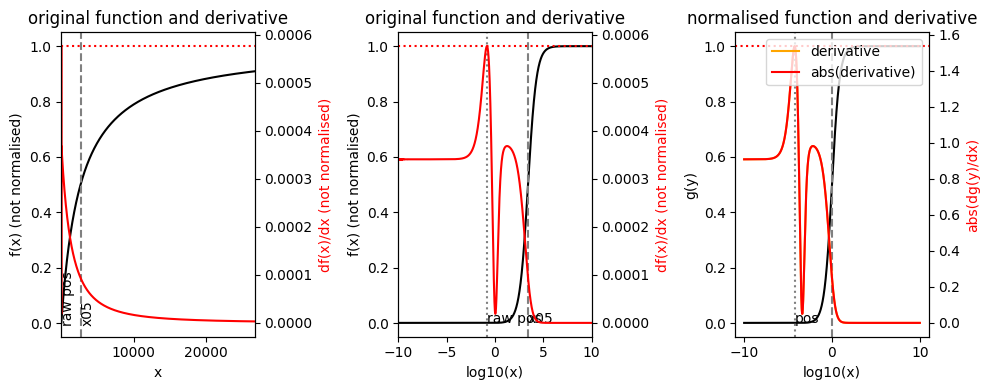

1000.0,0.001,0.0019382,0.00109626,0.0084468,0.001,341.089,0.001,0.001,0.001
pos: 3.64134127404333e-06 stp: 1.6593158571543687 x05: 341087.68219558295 raw position: 1.2420166552465506 raw steepness: 4.8647780138917505e-06


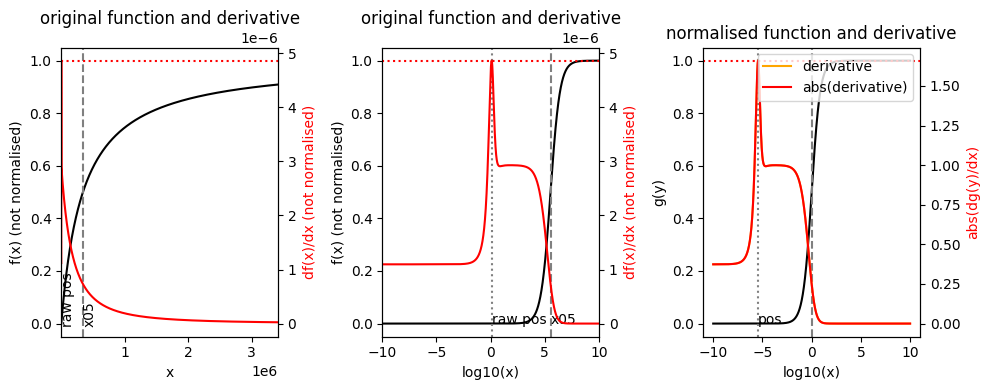

935.127,0.001,0.434566,0.001,0.001,0.001,1000.0,0.001,0.001,0.001
pos: 4.837279296563088e-07 stp: 1.7729388990703374 x05: 1000000.1387460784 raw position: 0.483727996771662 raw steepness: 1.7729386530820522e-06


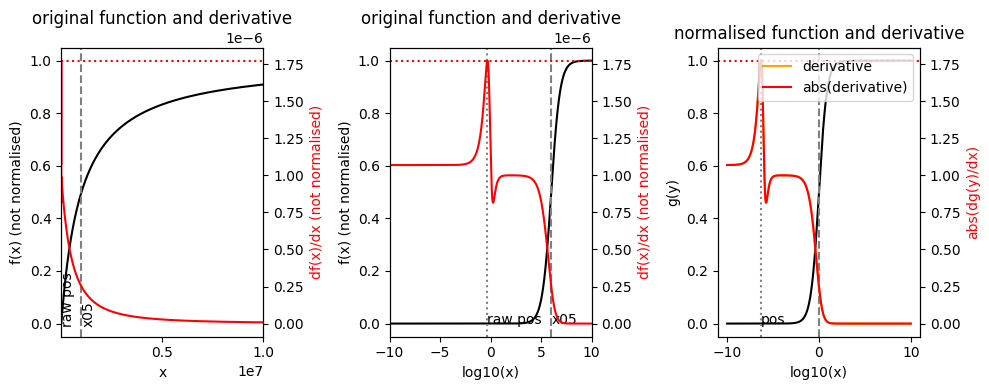

1000.0,0.00130533,0.0205901,0.001,0.001,0.001,1000.0,0.001,0.001,0.001
pos: 4.5751575731680075e-07 stp: 1.565859193959294 x05: 1000000.6106597971 raw position: 0.4575160367032803 raw steepness: 1.5658582377526203e-06


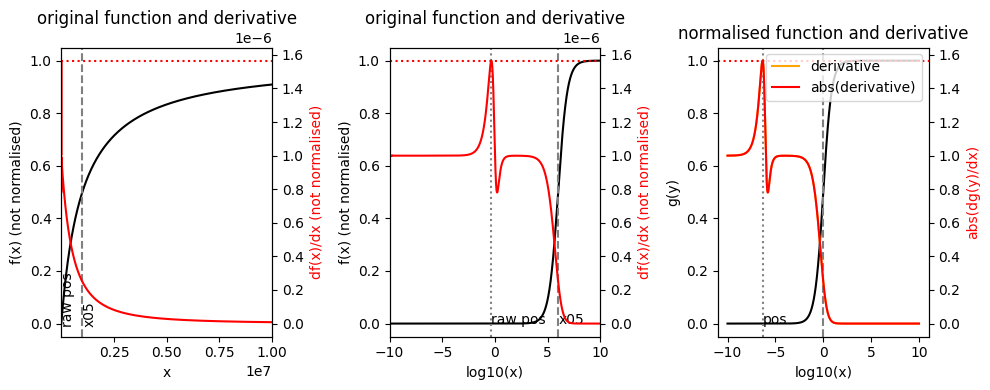

1000.0,0.00207224,0.00559318,0.00141014,0.001,0.001,1000.0,0.001,0.001,0.001
pos: 2.422869013158135e-07 stp: 1.6715188469233595 x05: 1000002.1444834438 raw position: 0.24228742089606203 raw steepness: 1.6715152623865533e-06


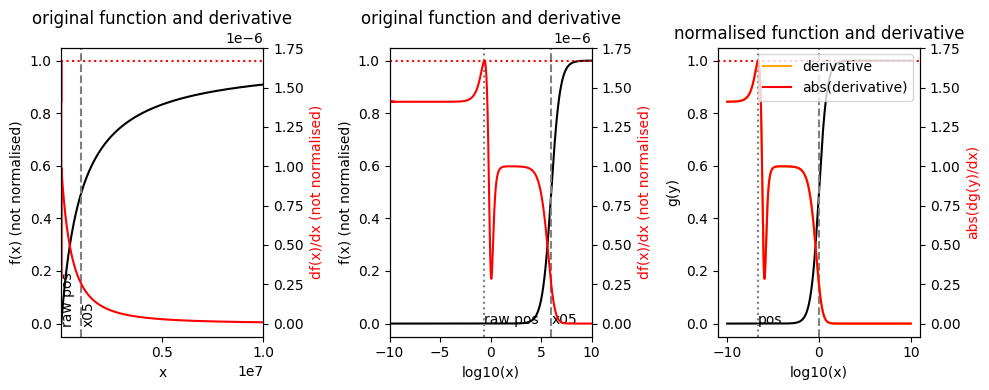

334.108,0.001,0.001,0.001,0.00383169,0.001,1000.0,0.001,0.00190991,0.00190991
pos: 2.656944072309639e-07 stp: 1.7979796452289476 x05: 523586.96802663984 raw position: 0.13911412910369572 raw steepness: 3.4339656160759664e-06


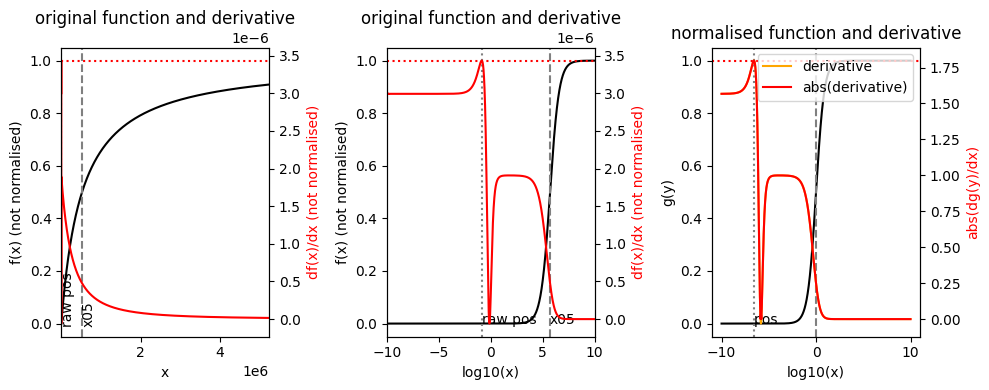

16.4731,0.001,0.0026481,0.001,0.00278252,0.001,14.9965,0.001,0.001,0.001
pos: 3.928532450455381e-05 stp: 1.7111748190586507 x05: 14996.320767230225 raw position: 0.5891353277150188 raw steepness: 0.0001141063095154572


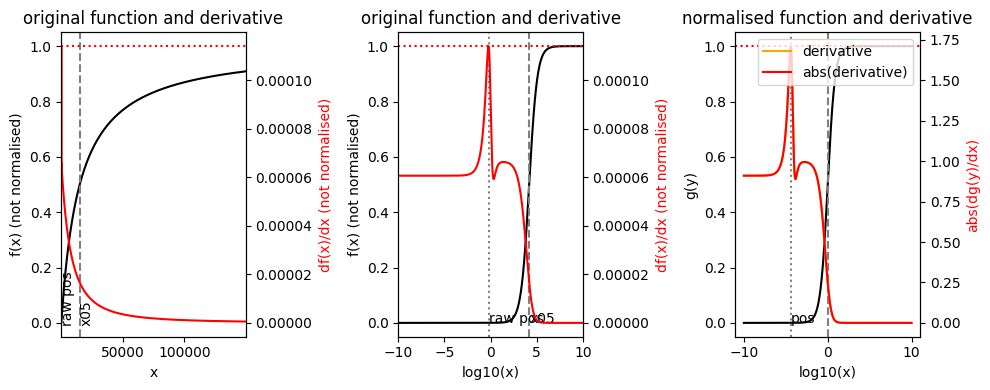

1000.0,0.001,0.0310666,0.00240494,0.079445,0.00171894,1000.0,0.001,0.00246801,0.00246801
pos: 1.324613299321859e-06 stp: 1.5040827237113696 x05: 405184.74406002683 raw position: 0.5367131006642352 raw steepness: 3.712091202250558e-06


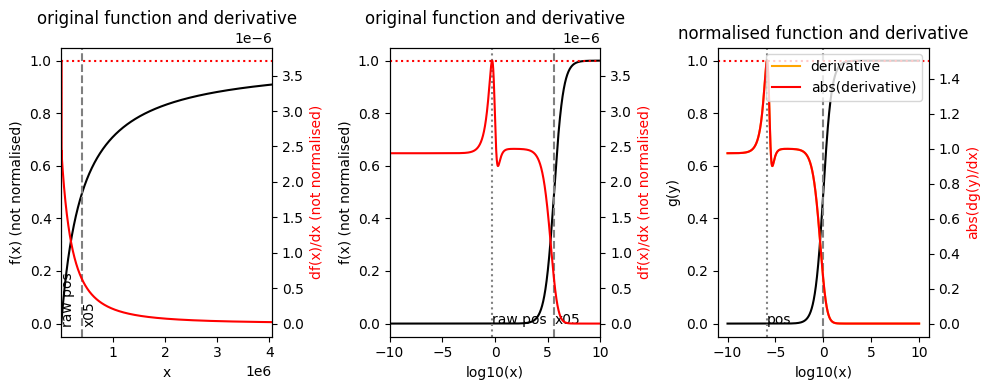

651.028,0.001,0.001,0.001,0.001,0.001,243.406,0.001,0.001,0.001
pos: 4.90253999264968e-06 stp: 1.664961224869595 x05: 243404.74775289712 raw position: 1.1933015102593854 raw steepness: 6.840298885869936e-06


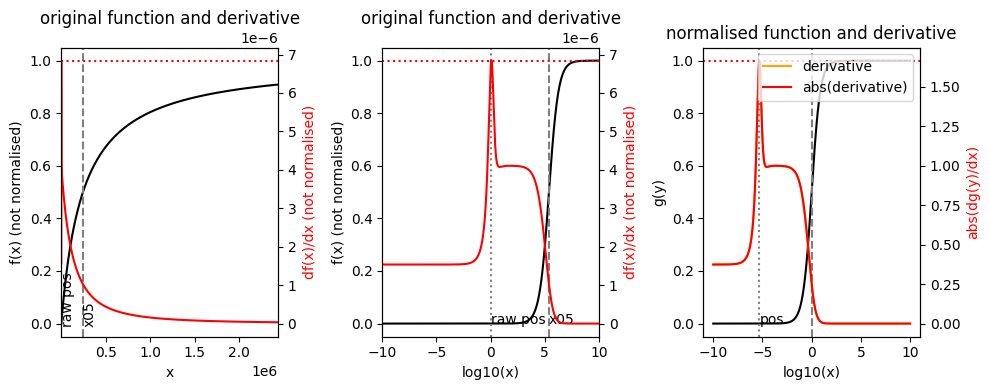

534.888,0.0229833,0.001,0.001,0.00208166,0.001,648.412,0.001,0.0126187,0.001
pos: 1.4712532016818758e-05 stp: 1.7807654395273576 x05: 51393.273377346246 raw position: 0.7561251800133257 raw steepness: 3.464977656613531e-05


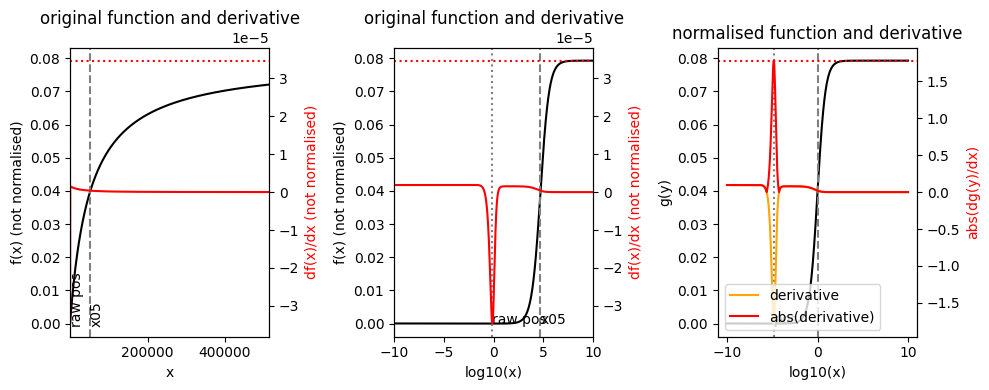

380.934,0.00248778,0.0187943,0.001,0.0581342,0.00182415,51.7391,0.001,0.001,0.001
pos: 3.550916348857558e-05 stp: 1.5970605969533411 x05: 51737.77683346384 raw position: 1.8371651761149055 raw steepness: 3.0868365335720555e-05


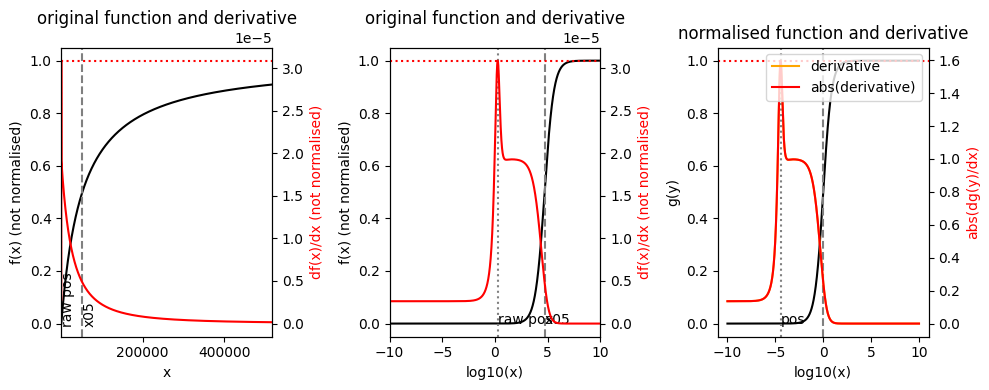

1000.0,0.001,0.001,0.001,0.001,0.001,937.345,0.001,0.001,0.001
pos: 6.074545472221297e-07 stp: 1.7203611746642544 x05: 937344.8746888079 raw position: 0.5693944064450737 raw steepness: 1.8353556104261014e-06


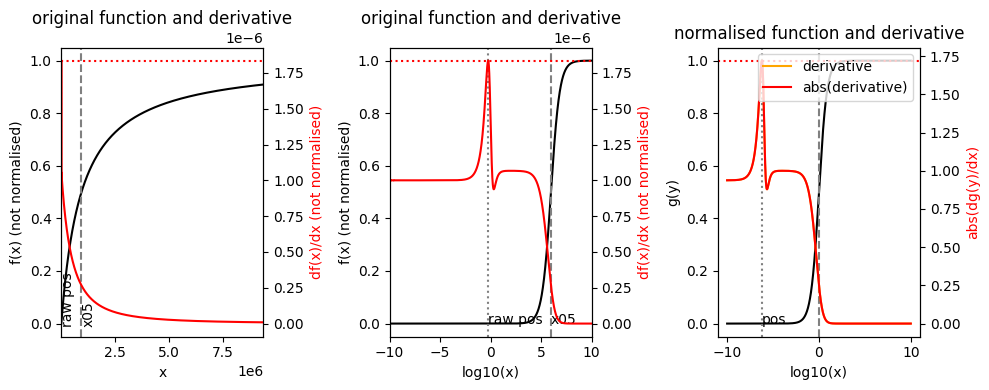

1000.0,0.00216251,0.001,0.001,0.00471833,0.001,185.266,0.001,0.001,0.001
pos: 9.329157032675268e-06 stp: 1.541525257024956 x05: 185264.80129123596 raw position: 1.72836442387332 raw steepness: 8.320659112152022e-06


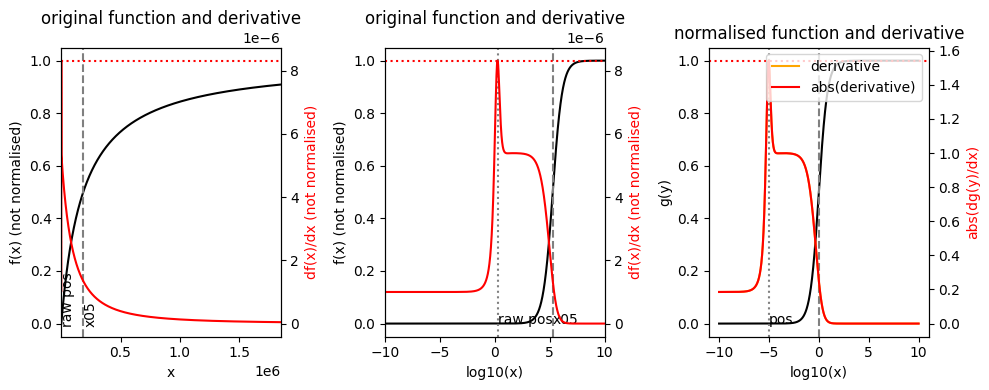

548.274,0.001,0.00578912,0.001,0.001,0.001,141.65,0.001,0.001,0.001
pos: 1.0209587320701892e-05 stp: 1.653783907133563 x05: 141648.51670268198 raw position: 1.4461729001239323 raw steepness: 1.1675264560693068e-05


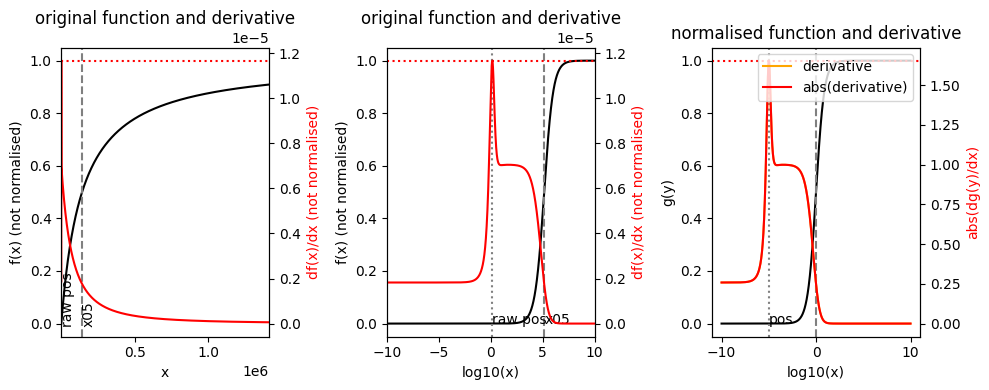

1000.0,0.00224691,0.001,0.001,0.0378512,0.00280629,185.266,0.001,0.001,0.001
pos: 7.736416524911448e-06 stp: 1.763658968036842 x05: 185264.83272344765 raw position: 1.4332859133666356 raw steepness: 9.519664051242405e-06


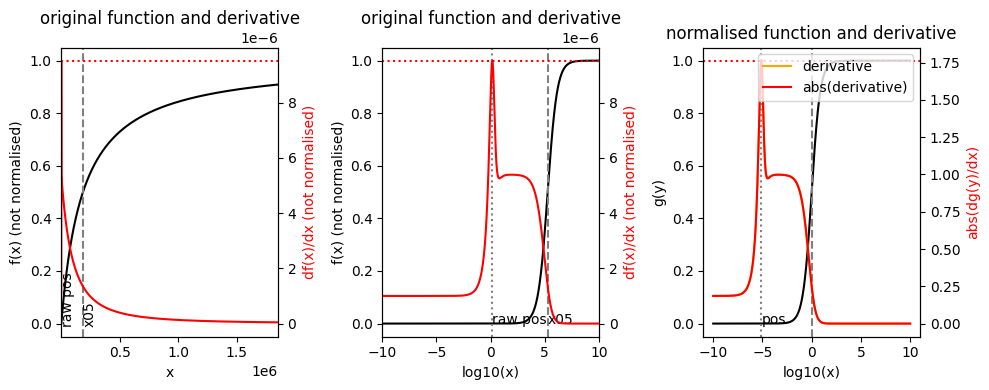

219.749,0.001,0.001,0.001,0.319945,0.00276091,1000.0,0.001,0.00471101,0.00471101
pos: 9.742366461093849e-07 stp: 1.5624885257290901 x05: 212270.2144139809 raw position: 0.20680142175959676 raw steepness: 7.360846786925273e-06


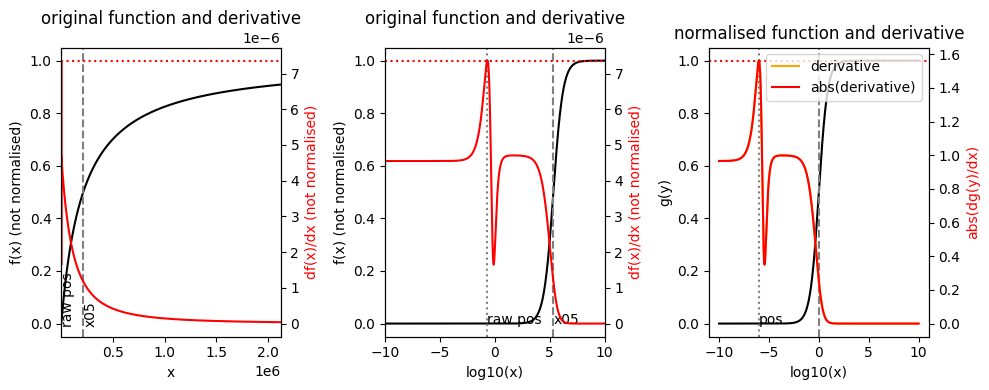

1000.0,0.001,0.001,0.001,0.001,0.001,732.38,0.001,0.001,0.001
pos: 1.0105753380205492e-06 stp: 1.675703014785562 x05: 732379.4647580993 raw position: 0.7401246251572251 raw steepness: 2.2880256689597886e-06


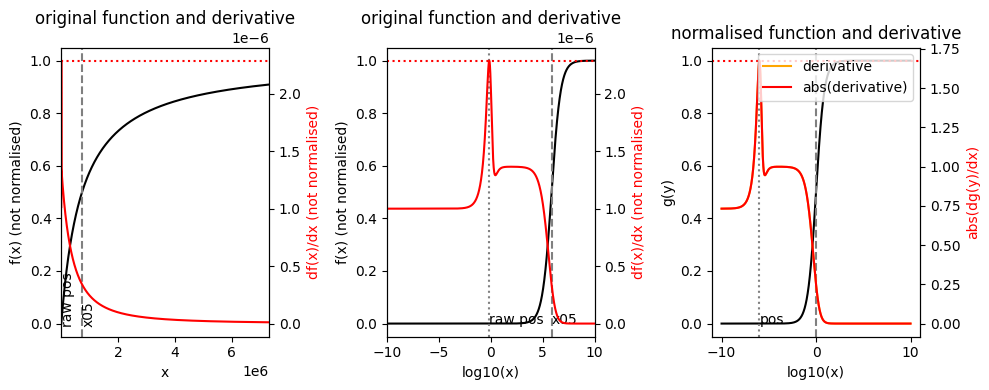

1000.0,0.001,0.001,0.001,0.00237197,0.00221099,191.584,0.001,0.001,0.001
pos: 7.703442861121282e-06 stp: 1.790714377669625 x05: 191582.38315568288 raw position: 1.4758439418372473 raw steepness: 9.346967858806006e-06


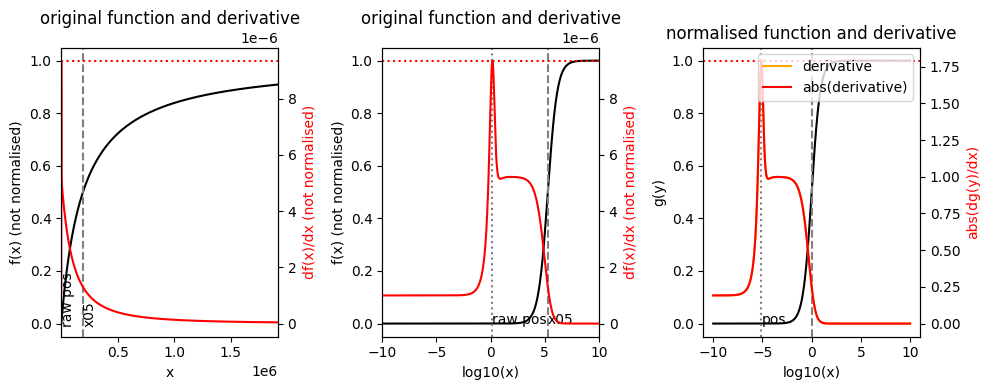

1000.0,0.001,0.0246618,0.001,0.001,0.001,108.683,0.001,0.001,0.001
pos: 1.959980233058808e-05 stp: 1.5992135886293293 x05: 108681.21735501885 raw position: 2.130130377206048 raw steepness: 1.4714719135003123e-05


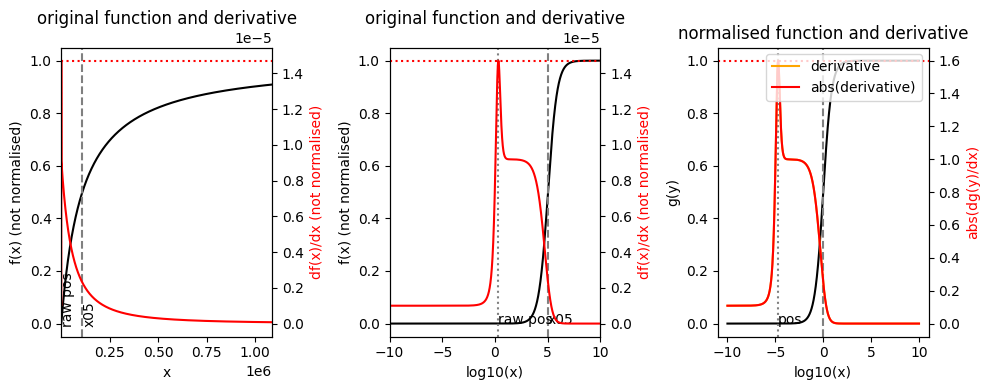

792.277,0.001,0.00235725,0.001,0.00205589,0.00176362,122.599,0.001,0.001,0.001
pos: 1.3943377357358328e-05 stp: 1.6936093445405076 x05: 122597.3094710579 raw position: 1.7094205489518004 raw steepness: 1.381440874883413e-05


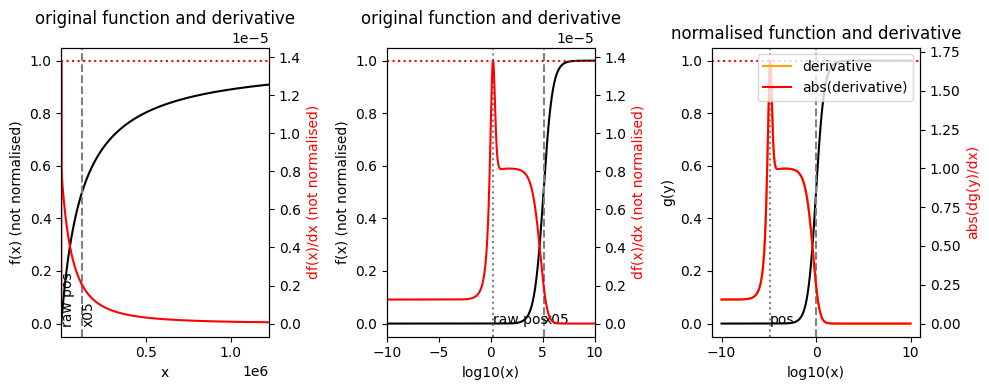

667.447,0.001,0.001,0.001,0.221029,0.001,132.02,0.001,0.001,0.001
pos: 1.2427158435742793e-05 stp: 1.6387806192814862 x05: 132018.39725363458 raw position: 1.6406135391037482 raw steepness: 1.2413274614545203e-05


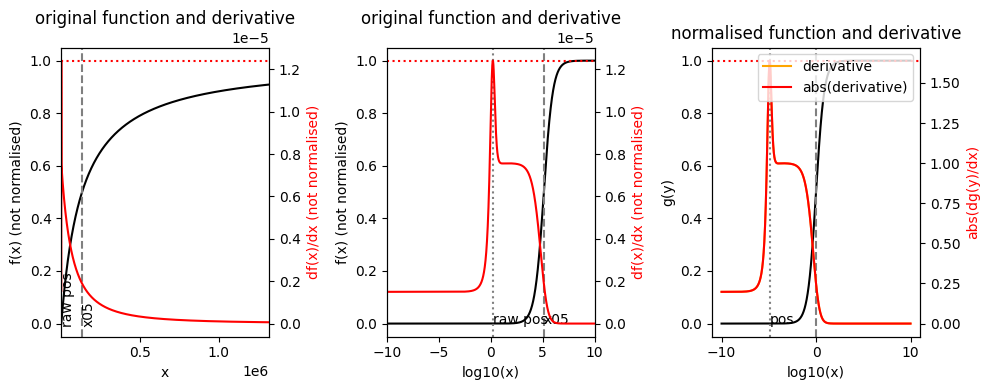

1000.0,0.001,0.00128162,0.001,0.001,0.001,108.958,0.001,0.001,0.001
pos: 1.9529275239676617e-05 stp: 1.599424038911733 x05: 108956.21790504063 raw position: 2.12783596854172 raw steepness: 1.4679511363965388e-05


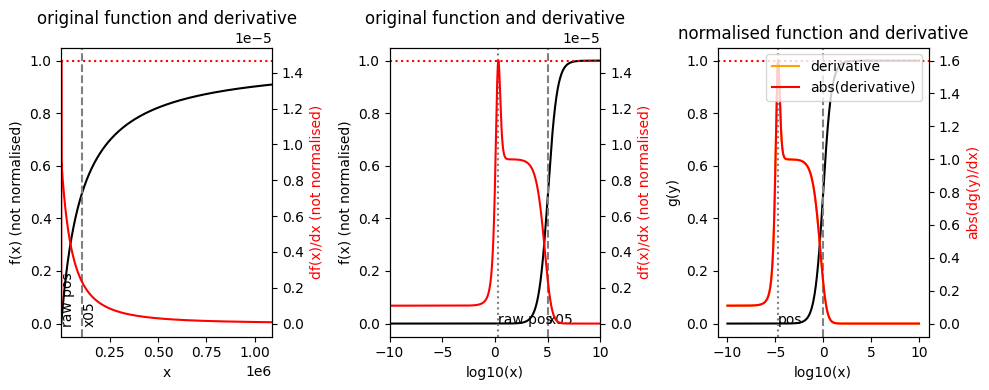

1000.0,0.001,0.00170283,0.001,0.001,0.001,1000.0,0.001,0.001,0.001
pos: 5.264404756994181e-07 stp: 1.7433411494968698 x05: 999999.999999 raw position: 0.5264404756988916 raw steepness: 1.7433411494986131e-06


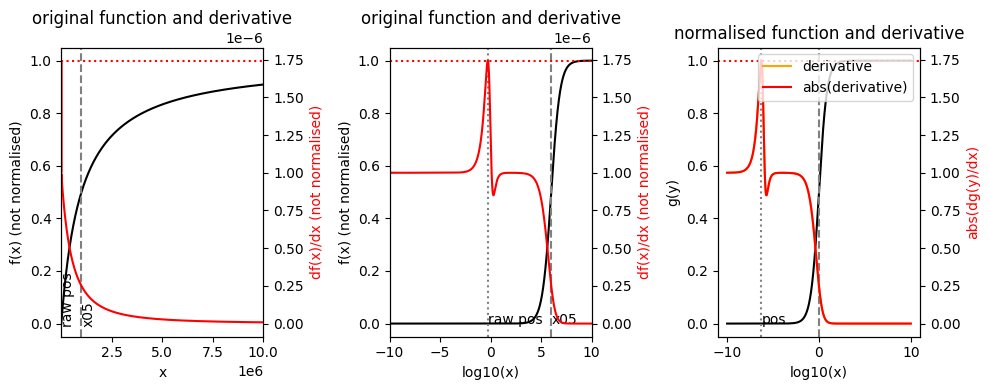

In [9]:
#now plot a few:
othervars=np.array([0])
subdf=subdf_lowp_highs
for i in range(len(subdf))[::10]:
    parset=subdf.iloc[i].values[2:].copy()
    print("==========")
    print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    if x05>1e-10 and x05<1e10:
        xmin=-10
        xmax=10
    else:
        print("x05 is too small or big, skipping", x05) #(numerical errors when plotting make these cases hard to interpret )
    makeplot(parset,instance=instance,xmin=xmin,xmax=xmax)


In [10]:
# high position - low steepness region

In [11]:
subdf_highp_lows=alldata[(alldata["pos"]>1.35)]
len(subdf_highp_lows)

848

In [12]:
#first doublecheck that raw position is AFTER x05:
othervars=np.array([0])
subdf=subdf_highp_lows
for i in range(len(subdf)):
    parset=subdf.iloc[i].values[2:].copy()
    #print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    rawpos=pos*x05
    if rawpos<x05:
        print("instance where it doesn´t hold")
        makeplot(parset,instance=instance,xmin=-10,xmax=10)
    else:
        print(".",end=",")

.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,

6.53577,0.001,2.86511,0.001,0.0709905,0.00688141,0.001,0.001,22.6106,0.0014947
pos: 1.353328453089376 stp: 0.00015085456502338029 x05: 0.26445913841904295 raw position: 0.3579000767019926 raw steepness: 0.0005704267431452755


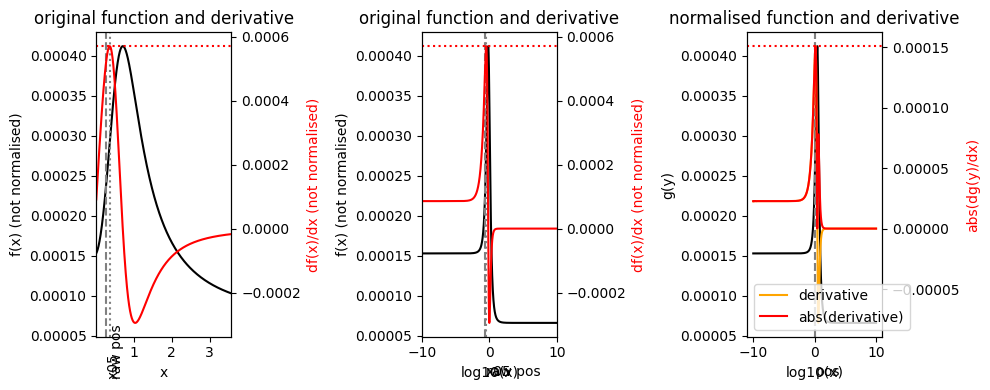

8.5618,6.53993,0.300358,0.0010138,0.271858,0.00293013,0.00155239,0.001,0.001,0.001
pos: 1.49309274003495 stp: 0.13970016366855548 x05: 1.629347745549635 raw position: 2.4327672898724733 raw steepness: 0.08573993123943582


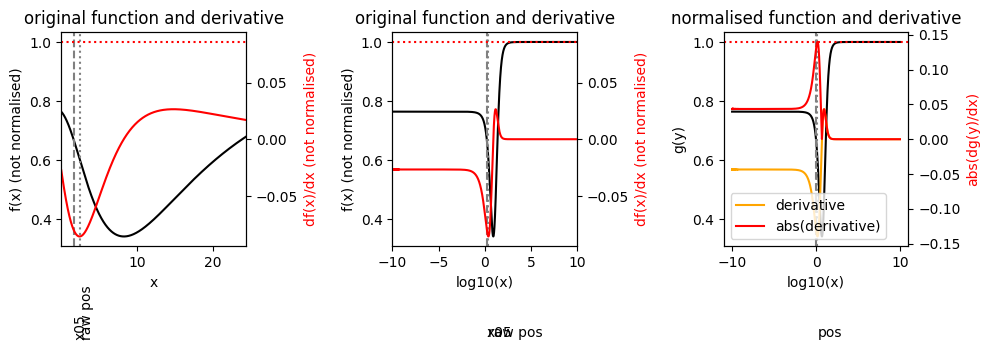

495.667,173.52,0.00137007,0.00118747,0.00417386,0.00157412,700.059,700.059,27.3549,0.001
pos: 1.390270159858472 stp: 0.2908274949621676 x05: 0.49637207808550016 raw position: 0.6900912883492102 raw steepness: 0.5859062340570907


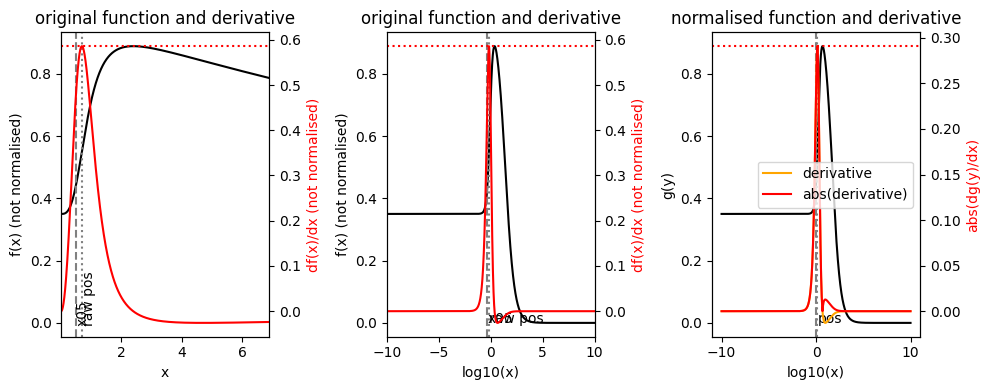

0.0106986,0.00626317,0.440312,0.001,127.507,0.0941879,1000.0,3.95166,0.001,0.001
pos: 1.4928519580320594 stp: 0.10676061287980175 x05: 0.002390291357593887 raw position: 0.0035683511334511434 raw steepness: 44.66426761768031


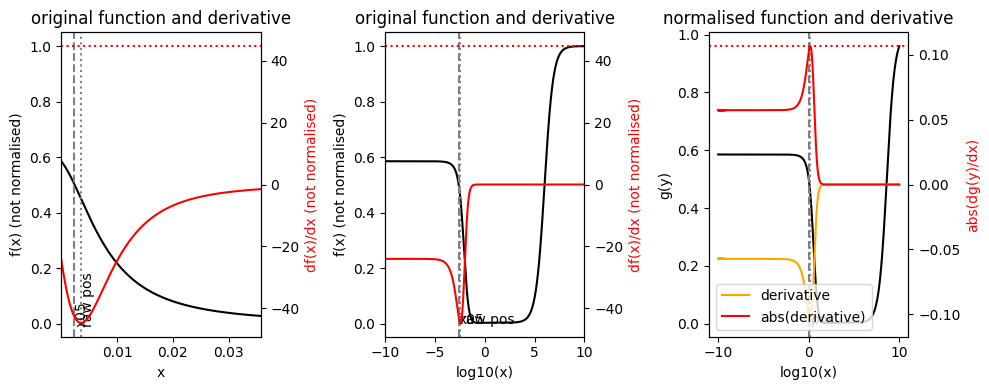

0.0818066,0.0308671,0.00105488,0.00105488,0.001,0.001,603.755,603.755,200.544,0.001
pos: 1.421855121356219 stp: 0.2814265834194988 x05: 0.028299240203911058 raw position: 0.04023741961442075 raw steepness: 9.94466923463919


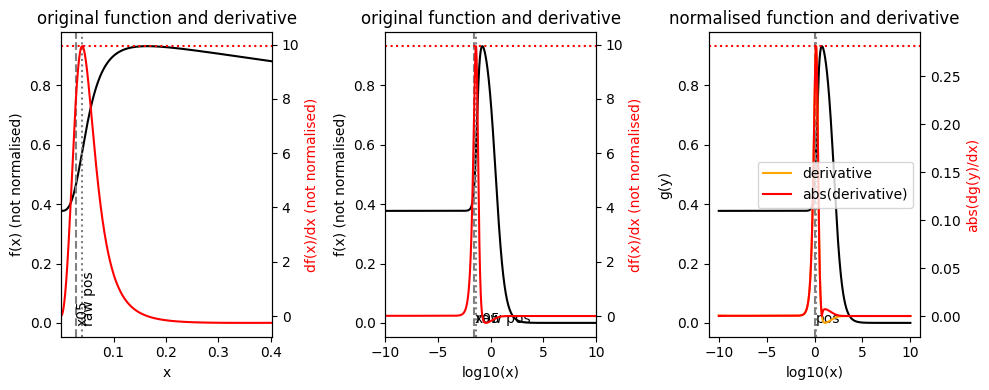

2.06752,0.44911,0.175201,0.001,137.085,0.00226598,759.812,0.0141475,0.00270742,0.001
pos: 1.4930968018680448 stp: 0.06891818696803058 x05: 0.04556238158885222 raw position: 0.06802904623580674 raw steepness: 1.5126116011655728


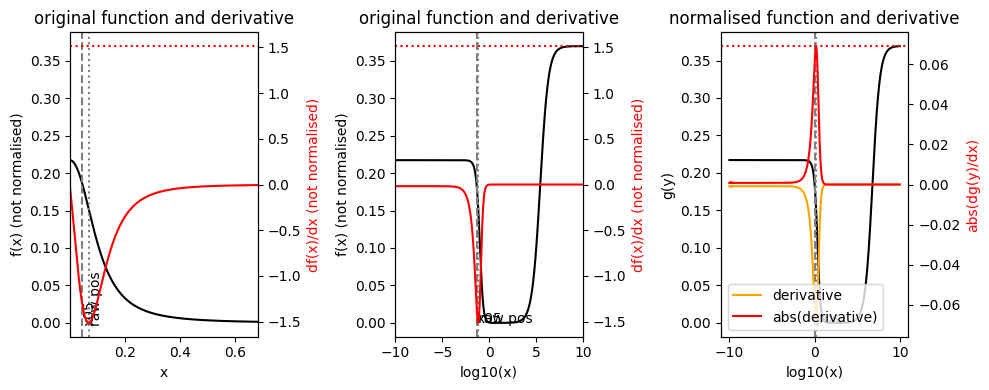

1000.0,346.448,0.904107,0.00122175,0.001,0.001,169.617,169.617,4.83159,0.00107509
pos: 1.4502689485290368 stp: 0.27170767993742867 x05: 0.9544496990107898 raw position: 1.3842087614082337 raw steepness: 0.2846746981208457


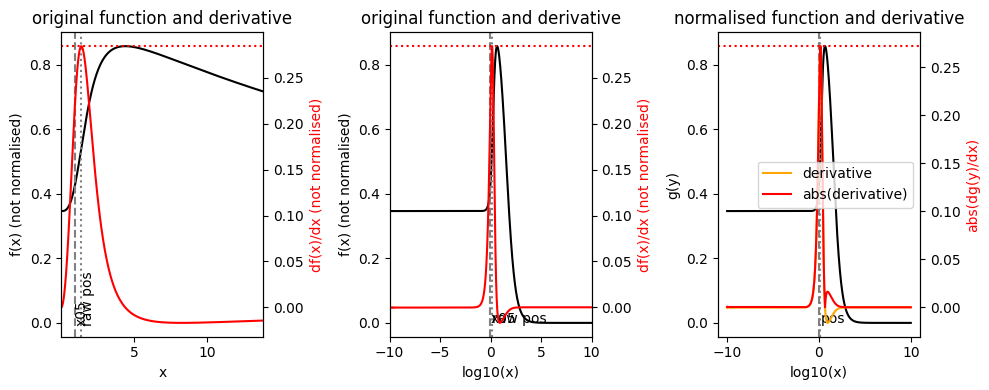

100.429,7.74752,0.143501,0.102053,0.0357048,0.001,0.178655,0.0261184,0.015612,0.001
pos: 1.4967525760997973 stp: 0.01434742710768083 x05: 3.184892113957552 raw position: 4.766995476165895 raw steepness: 0.004504839283190882


/var/folders/6c/k2rrfb9x7nqbhbcjqtwq2gy40000gn/T/ipykernel_36967/874502170.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


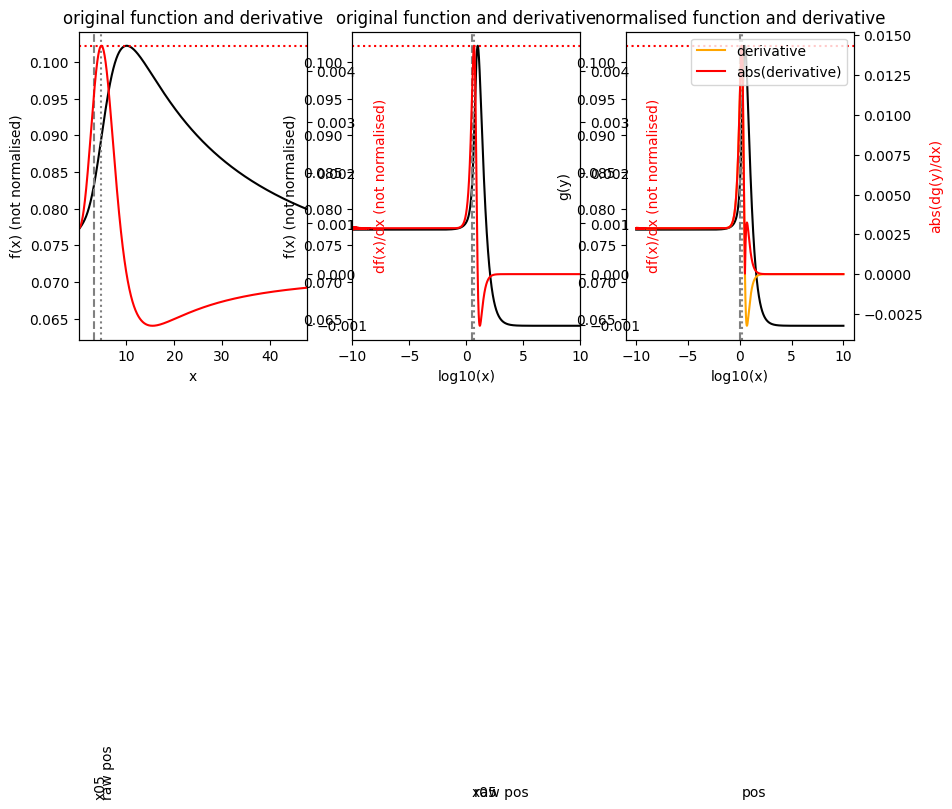

12.8436,8.50541,0.00248492,0.001,0.001,0.001,6.94815,0.00824674,0.380271,0.380271
pos: 1.4760121541177043 stp: 0.26284551280450824 x05: 0.6306234109409534 raw position: 0.9308078192200109 raw steepness: 0.41680265629897306


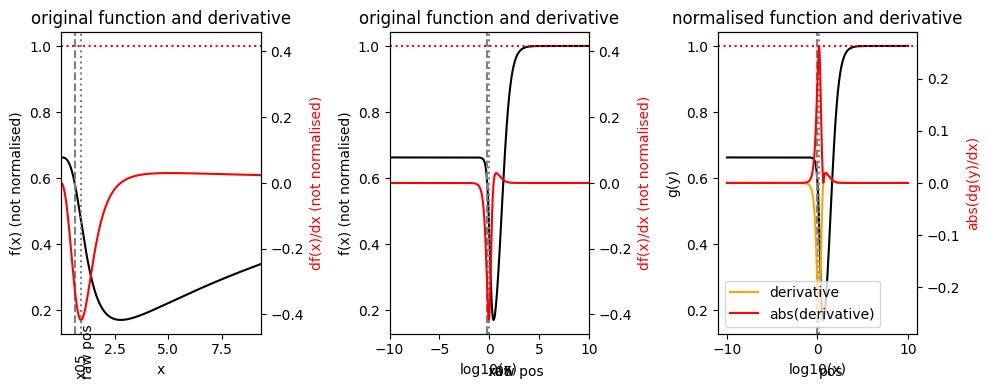

61.8881,0.001,0.0187979,0.001,0.0178468,0.0178468,0.001,0.001,889.65,0.001
pos: 1.4680942284396905 stp: 2.1163180243813036e-05 x05: 0.16987357793850014 raw position: 0.249390419335912 raw steepness: 0.00012458194205737402


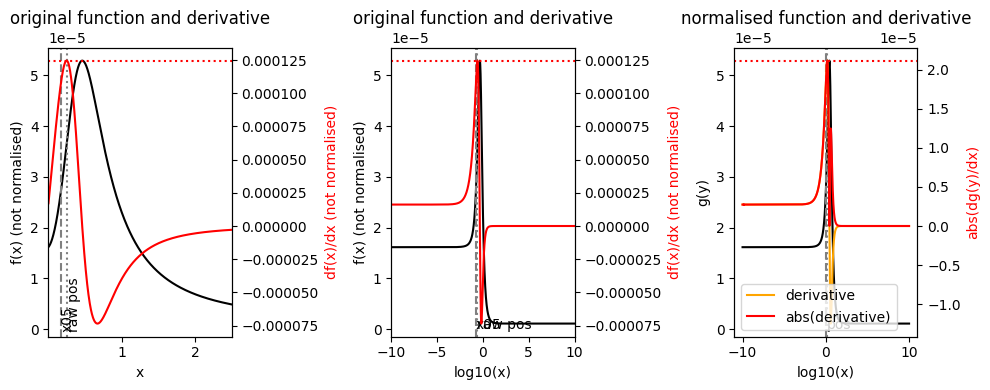

0.00171796,0.00100432,0.00107451,0.00107451,4.28282,0.001,1000.0,0.001,0.001,0.001
pos: 1.4931539063398476 stp: 0.22893724759203293 x05: 0.005505205958824413 raw position: 0.008220119782624078 raw steepness: 41.58559176611086


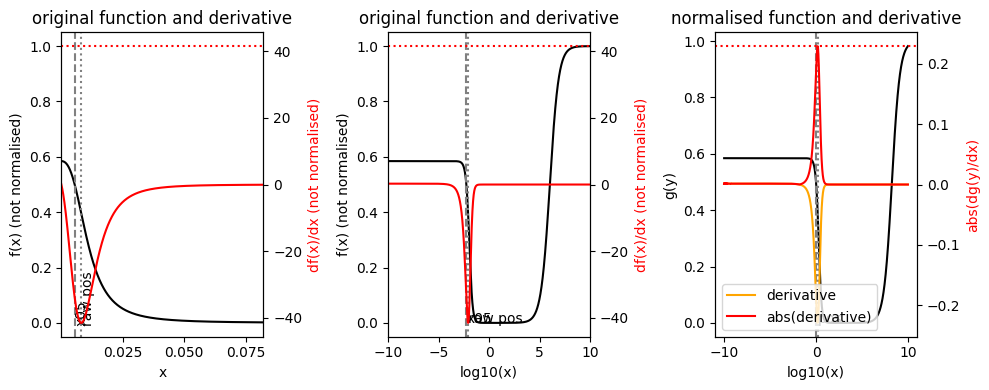

188.043,0.001,0.00195286,0.001,0.475438,0.0027157,6.44893,0.0099085,1000.0,0.00139061
pos: 1.4243180687164092 stp: 6.570372337411692e-06 x05: 0.26614598980454895 raw position: 0.3790765421950323 raw steepness: 2.4687098769501698e-05


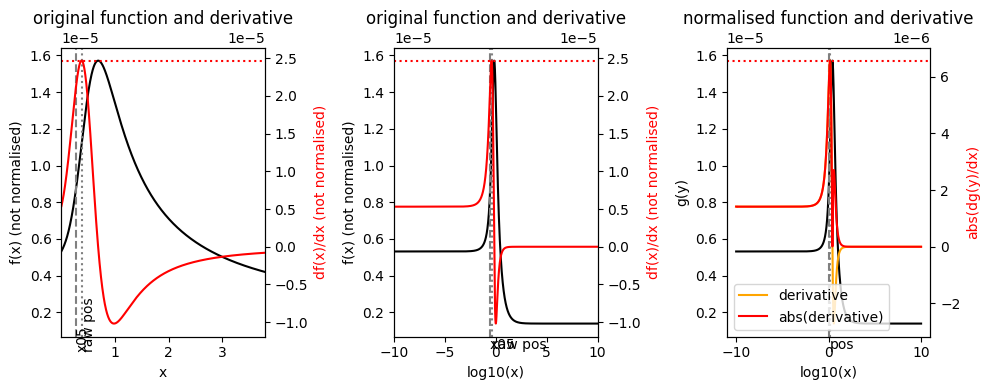

90.5782,55.7793,0.001,0.001,2.09873,0.849771,0.575422,0.0027961,0.001,0.001
pos: 1.4961669971866676 stp: 0.18602407579987765 x05: 2.438989893353506 raw position: 3.649136184907346 raw steepness: 0.07627094983329454


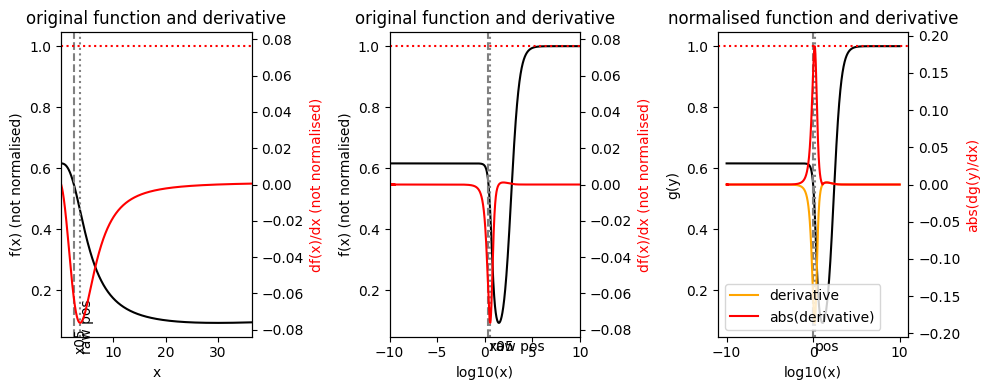

27.4255,0.001,0.001,0.001,0.001,0.001,2.22166,0.0105565,1000.0,0.0313214
pos: 1.3770677699583498 stp: 1.1612452178816609e-05 x05: 0.15627083838581132 raw position: 0.2151955349254709 raw steepness: 7.430978357041288e-05


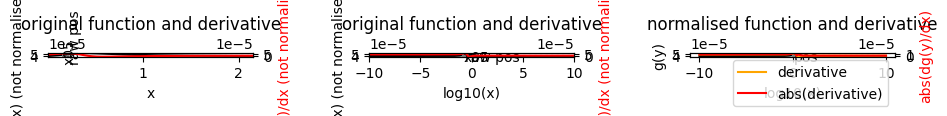

0.00493993,0.00197307,0.001432,0.001,0.605237,0.0790838,64.9162,0.001,0.00143975,0.001
pos: 1.4989290863182678 stp: 0.1592691011996577 x05: 0.021018367910650905 raw position: 0.03150504300821316 raw steepness: 7.577615059204918


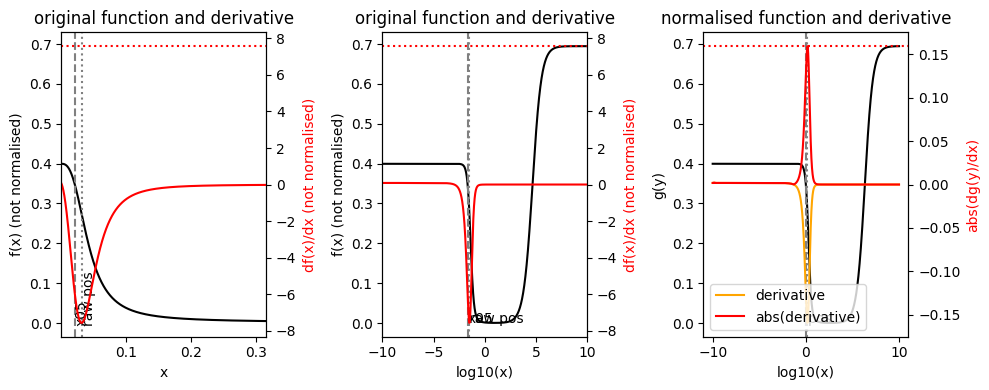

0.522001,0.191114,0.001,0.001,0.00647918,0.0023083,65.0942,65.0942,5.25733,0.001
pos: 1.3611412957944142 stp: 0.3000093604941709 x05: 0.11530418232331852 raw position: 0.15694528413807715 raw steepness: 2.6018948701524987


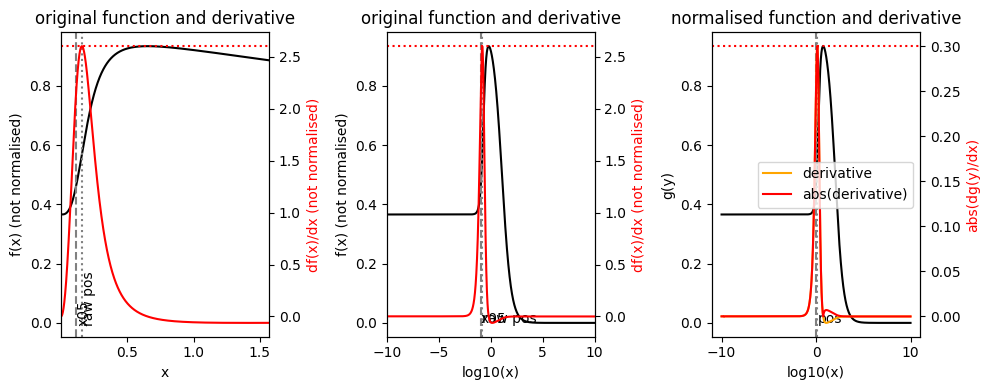

405.269,60.3286,0.028983,0.00849501,0.001,0.001,648.412,336.988,128.446,0.0338458
pos: 1.4923866557812184 stp: 0.12630120598957797 x05: 0.4125357412578729 raw position: 0.6156628352860629 raw steepness: 0.30615821456940884


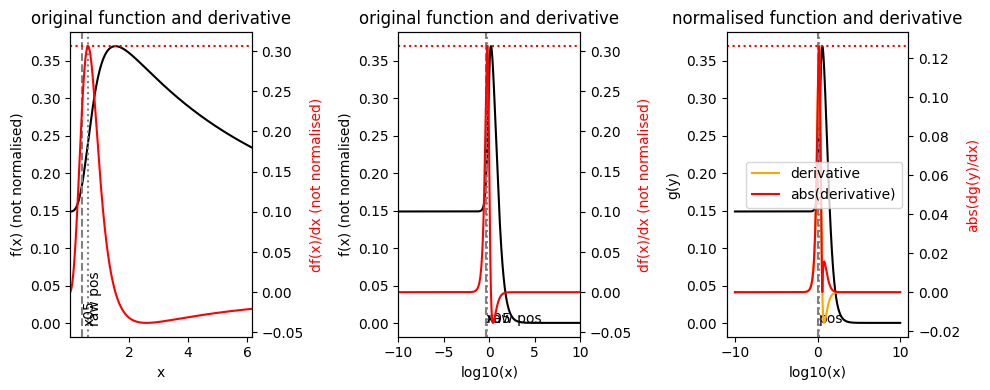

545.745,202.272,0.00125238,0.001,0.001,0.001,565.804,565.804,6.69329,0.00138217
pos: 1.3505190146827928 stp: 0.30313197885446974 x05: 0.5755920573454523 raw position: 0.7773480181454218 raw steepness: 0.5266437835373733


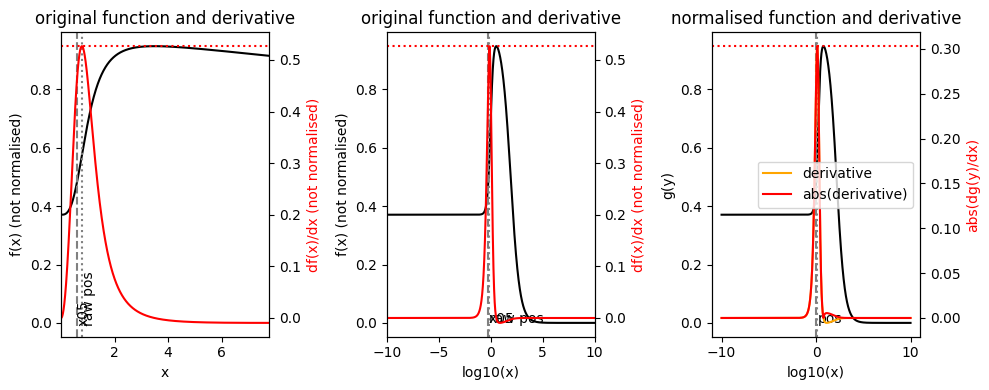

0.320529,0.0990306,0.538927,0.0145159,38.8662,0.64935,486.348,0.121953,0.00193691,0.001
pos: 1.4912783804030791 stp: 0.09402311998234197 x05: 0.03062510137037104 raw position: 0.04567055157128705 raw steepness: 3.0701325309997767


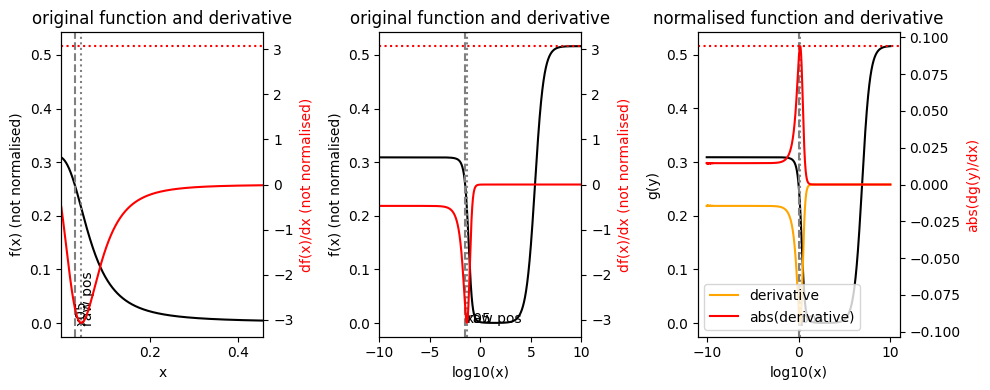

14.3373,9.02048,0.001,0.001,0.00188304,0.001,1.69779,0.001,0.0185653,0.0185653
pos: 1.4244037517318866 stp: 0.2807212771287137 x05: 1.1160646819620066 raw position: 1.589726720162137 raw steepness: 0.251527784783239


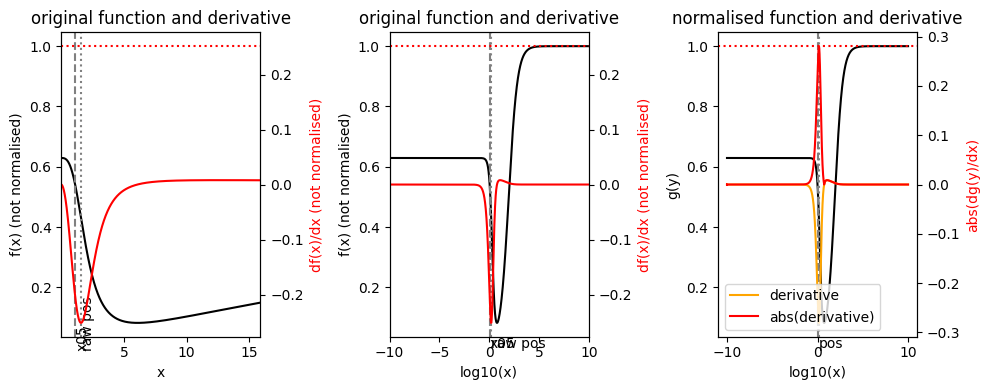

0.00370705,0.001,0.00414865,0.001,3.03206,0.001,32.457,0.00129977,0.0021651,0.001
pos: 1.4910009401096382 stp: 0.07866812205178485 x05: 0.013427335569640651 raw position: 0.020020169957501794 raw steepness: 5.858803605806524


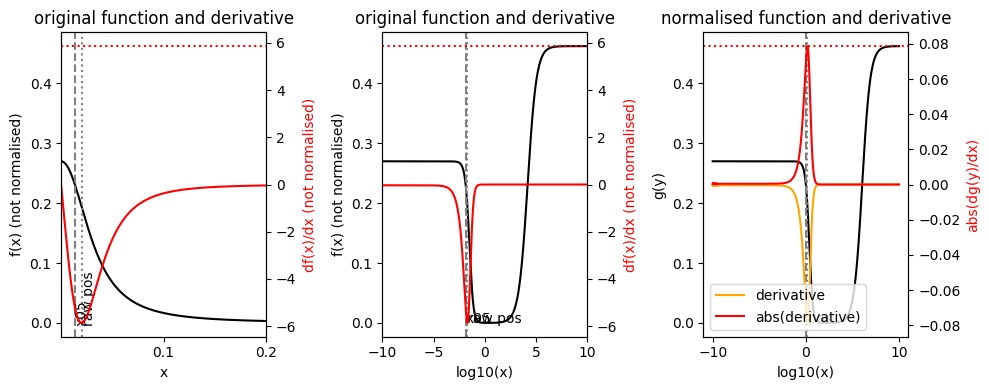

1000.0,346.686,0.0111995,0.00382546,0.001,0.001,704.628,704.628,26.0763,0.001
pos: 1.406148733394207 stp: 0.2854635239638062 x05: 0.616030640050939 raw position: 0.8662307042396505 raw steepness: 0.46339176236461466


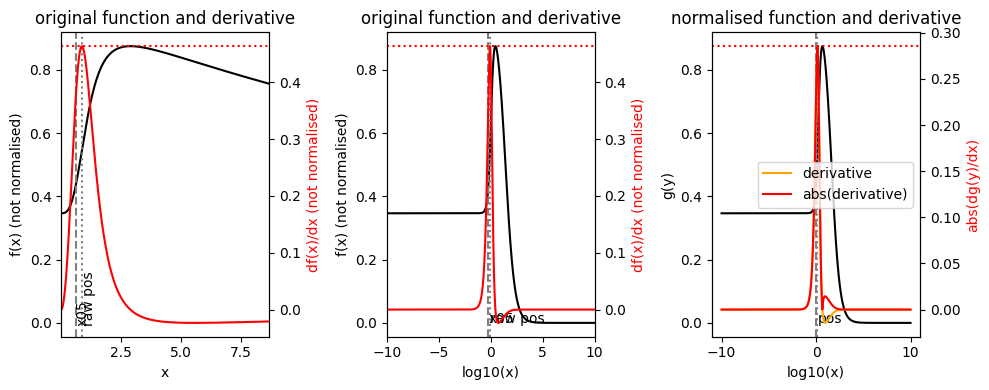

718.319,51.1128,0.0236009,0.001,0.0393269,0.00393961,145.678,24.1426,0.327339,0.00148973
pos: 1.497850369910417 stp: 0.04171759315822032 x05: 0.8991210528825979 raw position: 1.3467488016544429 raw steepness: 0.04639819413022639


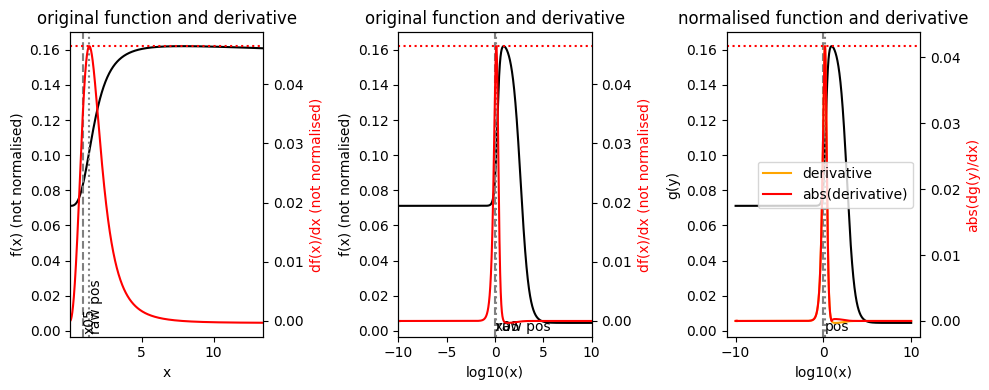

1000.0,374.942,0.513742,0.001,0.00143552,0.001,230.278,230.278,2.88073,0.001
pos: 1.4307499723060904 stp: 0.2789602059018707 x05: 0.8916201573005499 raw position: 1.2756855153653137 raw steepness: 0.31286888661921314


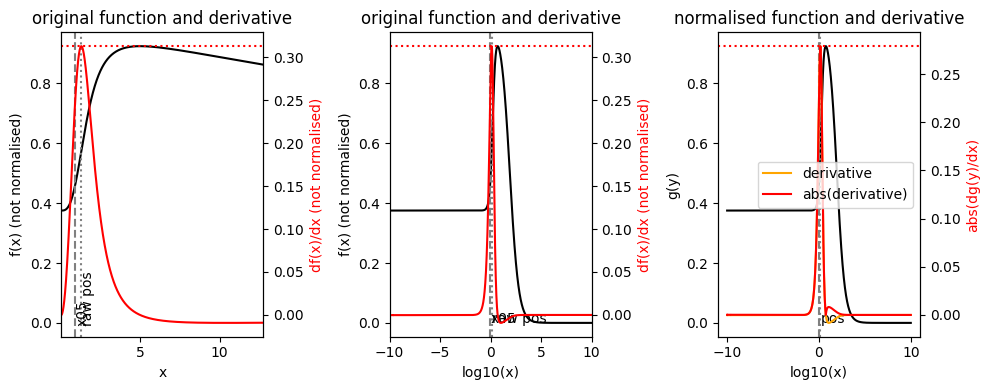

0.0691987,0.001,0.0440914,0.001,0.00143672,0.00143672,0.910377,0.138444,5.125,0.00311918
pos: 1.4914278533423249 stp: 0.015409180085371217 x05: 0.14018526388926916 raw position: 0.20907620719260003 raw steepness: 0.10992011326912908


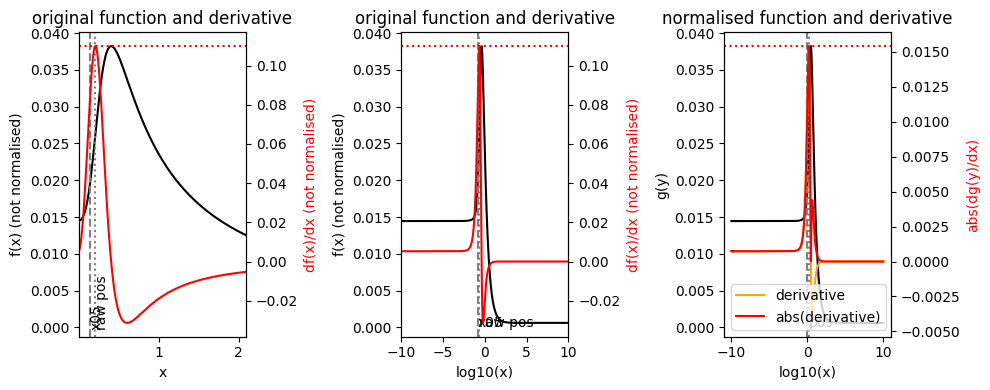

2.19118,0.831062,0.0143886,0.00189777,0.001,0.001,82.2194,82.2194,6.50842,0.00169001
pos: 1.4791028538220197 stp: 0.2659780722547437 x05: 0.15755576845393396 raw position: 0.23304118675633506 raw steepness: 1.6881519151265487


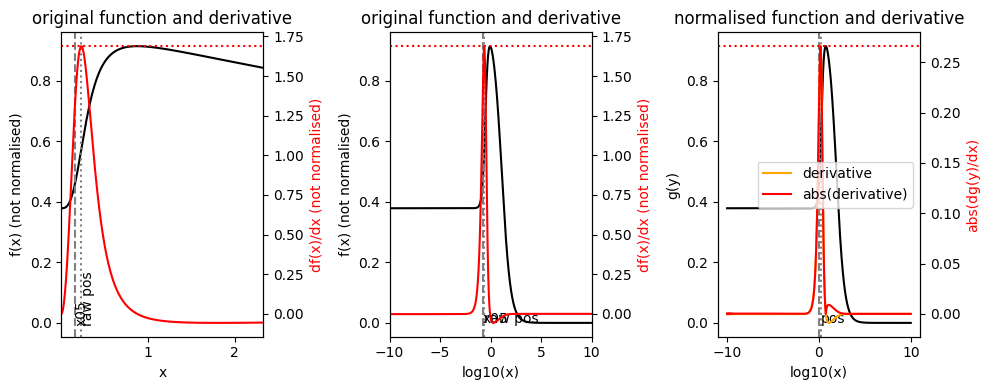

43.4416,0.546707,0.001,0.001,58.1503,0.00364539,31.2345,27.2277,1000.0,0.001
pos: 1.498404712954917 stp: 0.013887790153843222 x05: 0.2007199185900446 raw position: 0.3007596719992501 raw steepness: 0.06918989530983218


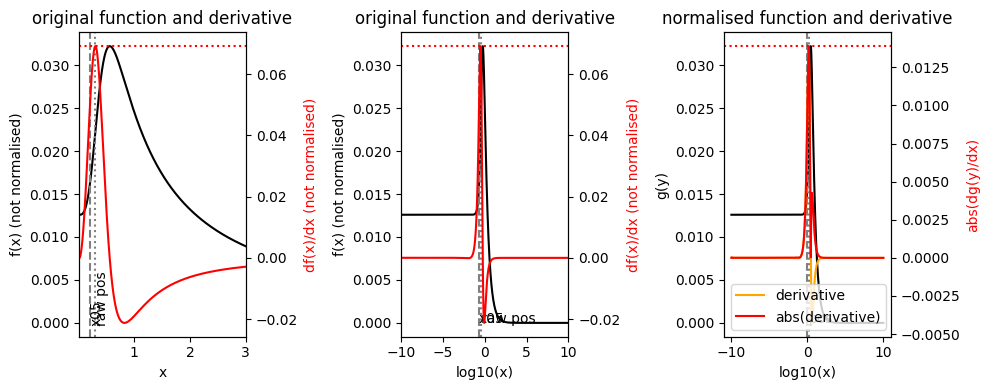

0.0251047,0.00932021,0.001,0.001,0.00361521,0.001,1000.0,1000.0,1000.0,0.00122136
pos: 1.473535108964549 stp: 0.2674066102858682 x05: 0.015429918174975582 raw position: 0.022736526159276717 raw steepness: 17.33039717083862


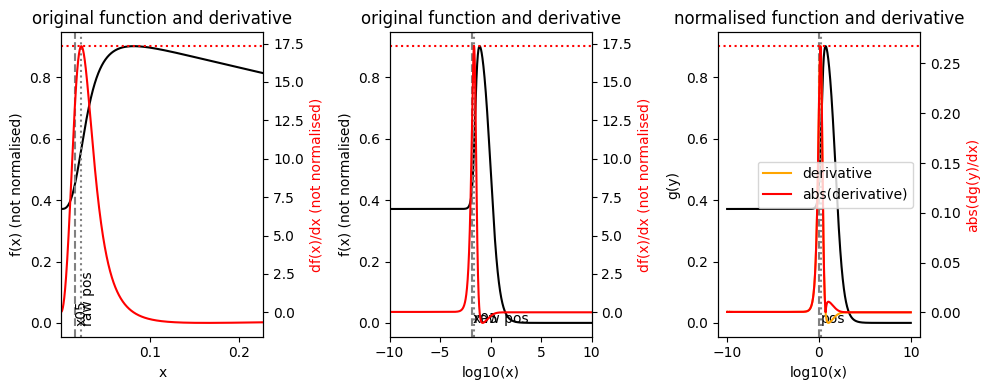

0.911453,0.001,0.367502,0.0128247,0.0669049,0.0434213,0.00196503,0.001,148.582,0.001
pos: 1.4510181696305504 stp: 0.0013364096804260033 x05: 0.06853319510933997 raw position: 0.09944291132648787 raw steepness: 0.01950018058101412


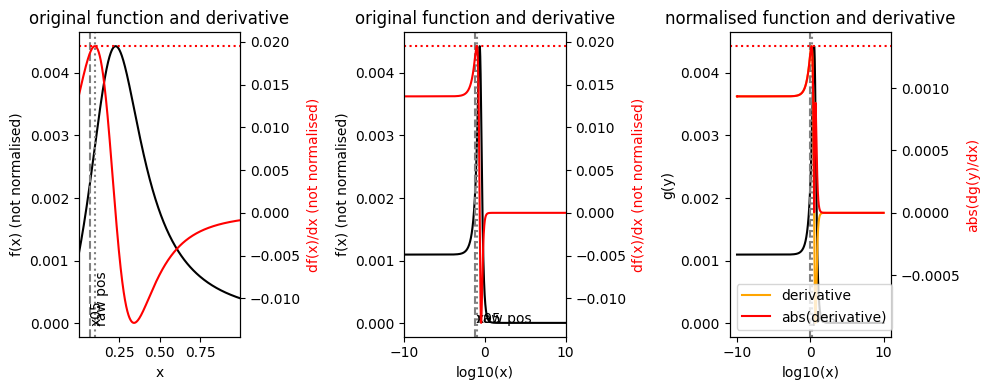

0.0017057,0.001,0.001,0.001,1.38372,0.001,96.1153,0.148226,0.001,0.001
pos: 1.4951367063856422 stp: 0.21596055800453715 x05: 0.011114860834950224 raw position: 0.01661823642070225 raw steepness: 19.42989311440212


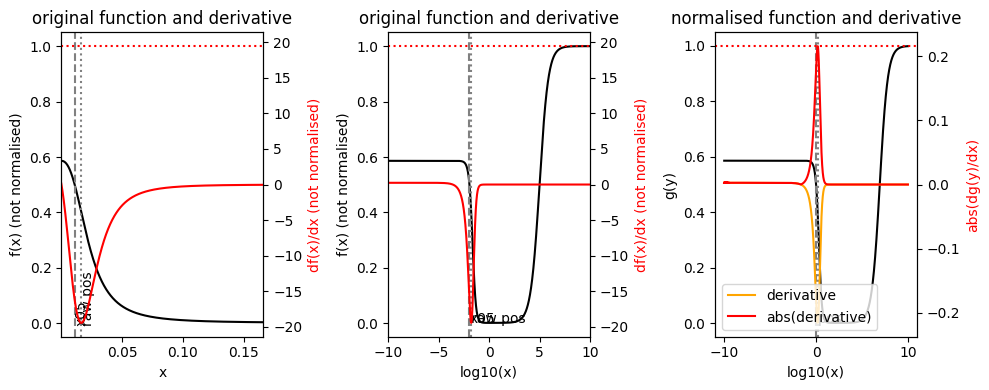

272.954,0.001,65.8311,0.00307507,0.0340596,0.001,0.001,0.001,725.855,0.001
pos: 1.4111909814163377 stp: 1.4275417890328697e-06 x05: 0.13174911918229015 raw position: 0.18592316879959409 raw steepness: 1.0835304234996064e-05


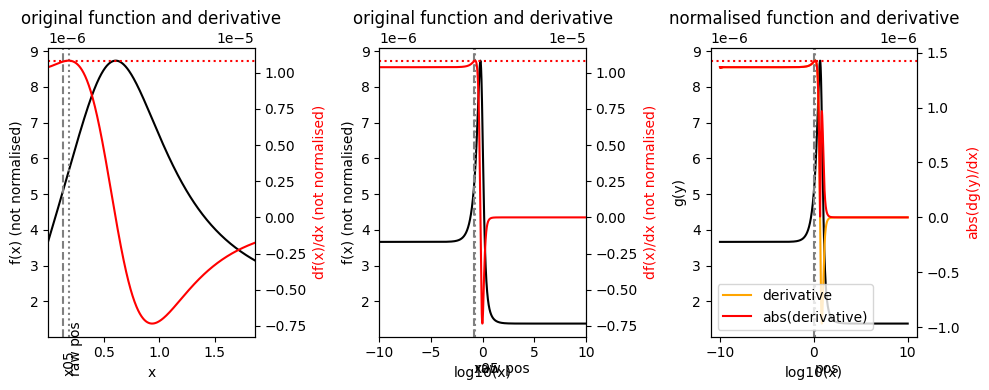

0.00206596,0.00119795,0.00185948,0.001097,4.18962,0.54634,256.368,0.0746999,0.001,0.001
pos: 1.4913808011027985 stp: 0.18801597751076027 x05: 0.008020818804229377 raw position: 0.011962095173751998 raw steepness: 23.440995501808302


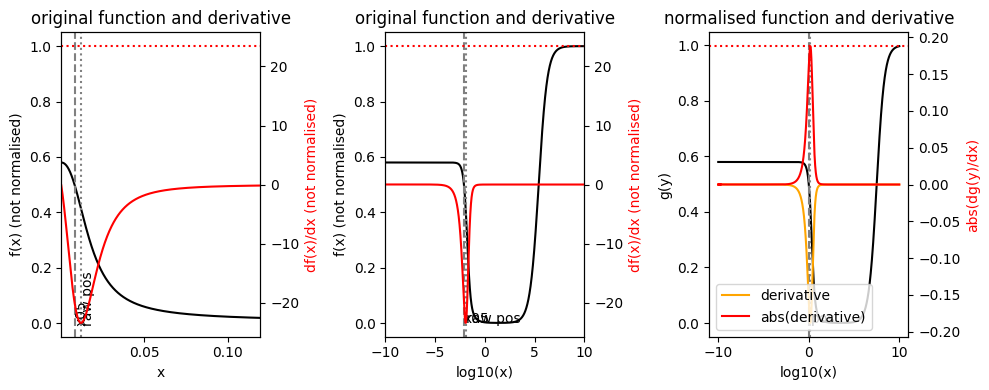

0.484359,0.001,0.0767949,0.00168263,0.0018832,0.001,1.16629,1.16629,757.229,0.001
pos: 1.4063678809354367 stp: 0.0031438039063017035 x05: 0.07431736151068842 raw position: 0.10451755022449966 raw steepness: 0.04230241551093761


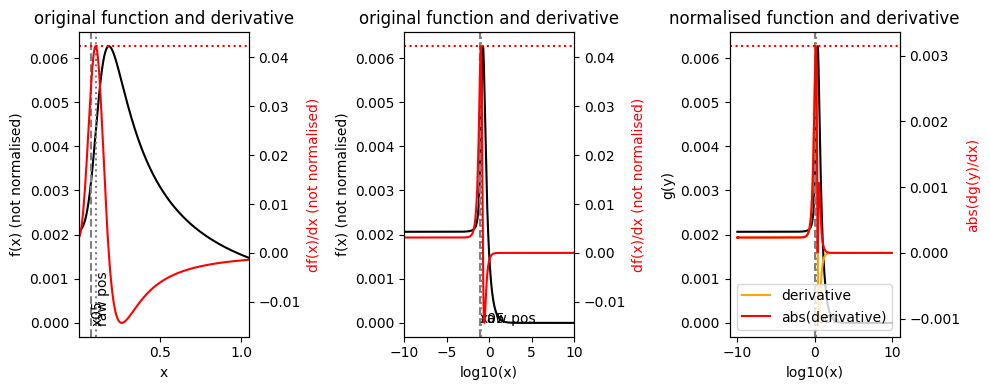

1000.0,228.894,0.0522745,0.00200039,0.0016208,0.001,108.958,108.958,35.9036,2.13088
pos: 1.4922517988412012 stp: 0.17055287347046136 x05: 0.8657999021746536 raw position: 1.291991461456663 raw steepness: 0.19698878810459436


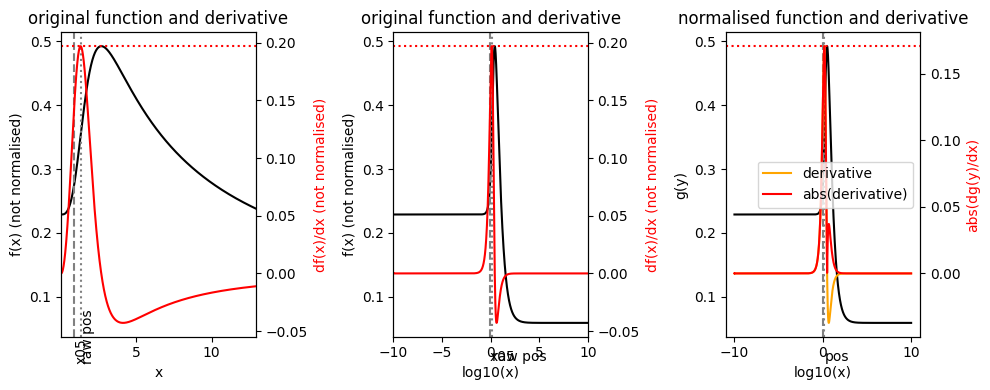

In [13]:
#now plot a few:
othervars=np.array([0])
subdf=subdf_highp_lows
for i in range(len(subdf))[::25]:
    parset=subdf.iloc[i].values[2:].copy()
    print("==============")
    print(",".join(map(str,parset)))
    instance.fill_num_den(parset,othervars)
    pos,stp,x05=instance.interfaceps(minx0=False,maxx1=False,absder=True) #this will normalise the coefficients
    
    if x05>1e-10 and x05<1e10:
        xmin=-10
        xmax=10
    else:
        print("x05 is too small or big, skipping", x05) #(numerical errors when plotting make these cases hard to interpret )
    makeplot(parset,instance=instance,xmin=xmin,xmax=xmax)
